<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240215/kyungmin_kwak_1_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd drive/MyDrive/lecture/medical_ai/1stSeries_07.05.21

In [4]:
import glob
import csv
import pandas as pd
path = "drive/MyDrive/lecture/medical_ai/1stSeries_07.05.21/*/{}*".format('W')
df_list = []
ri_list = []
for file in glob.glob(path, recursive = True) :
  f = open(file,'rt')
  reader = csv.reader(f)
  csv_context = []
  for raw in reader :
    csv_context.append(raw)
  f.close()

  df_list.append(pd.DataFrame(csv_context)[24:])
  ri_list.append(file.split('/')[-2])

<Axes: xlabel='0'>

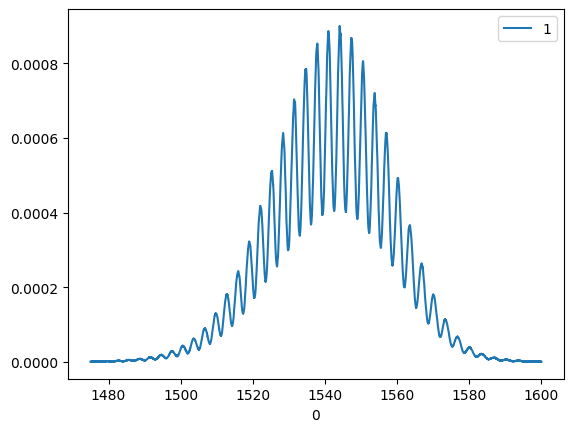

In [13]:
df_list[0].astype(float).plot(x=0, y=1)

# 새 섹션

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(df_list, ri_list, test_size=0.1)


In [6]:
nsamples, nx, ny = np.array(x_train).shape
d2_x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
d2_x_test = np.array(x_test).reshape((nsamples,nx*ny))

In [7]:
rand_model = RandomForestClassifier(max_depth=2, random_state=0)
dec_model = DecisionTreeClassifier(random_state = 0)
lda = LinearDiscriminantAnalysis(n_components=2)
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [8]:
lda.fit(d2_x_train, y_train)
knn_model.fit(d2_x_train, y_train)
rand_model.fit(d2_x_train, y_train)
dec_model.fit(d2_x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
lda_pred = lda.predict(d2_x_test)
knn_pred = knn_model.predict(d2_x_test)
rand_pred = rand_model.predict(d2_x_test)
dec_pred = dec_model.predict(d2_x_test)

print('KNN Acc : {}'.format(accuracy_score(y_test,knn_pred)))
print('LDA Acc : {}'.format(accuracy_score(y_test,lda_pred)))
print('RAND Acc : {}'.format(accuracy_score(y_test,rand_pred)))
print('DEC Acc : {}'.format(accuracy_score(y_test,dec_pred)))

KNN Acc : 0.6666666666666666
LDA Acc : 0.9166666666666666
RAND Acc : 0.625
DEC Acc : 0.8333333333333334


In [14]:
print('KNN F1-score : {}'.format(f1_score(y_test, knn_pred, average='macro')))
print('LDA F1-score : {}'.format(f1_score(y_test, lda_pred, average='macro')))
print('RAND F1-score : {}'.format(f1_score(y_test, rand_pred, average='macro')))
print('DEC F1-score : {}'.format(f1_score(y_test, dec_pred, average='macro')))

KNN F1-score : 0.6203703703703703
LDA F1-score : 0.8823529411764706
RAND F1-score : 0.4982456140350877
DEC F1-score : 0.6942355889724311


In [ ]:
xgb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_model.fit(d2_x_train, y_train)

In [ ]:

xgb_pred = xgb_model.predict(d2_x_test)
print('XGB Acc : {}'.format(accuracy_score(y_test,xgb_pred)))